In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from datasets import prepare_poison_dataset
from util import *

In [2]:
dataset_name = "sig-1"
train = True

simclr_model_name = f"{dataset_name}-SimCLR.pt"

dataset, true_poison_indices, _, _ = prepare_poison_dataset(dataset_name, train)
simclr, _ = load_simclr(simclr_model_name)
features, labels_poison, labels_true = extract_simclr_features(simclr, dataset)
num_classes = int(max(labels_poison).item())


SimCLR epochs = 250


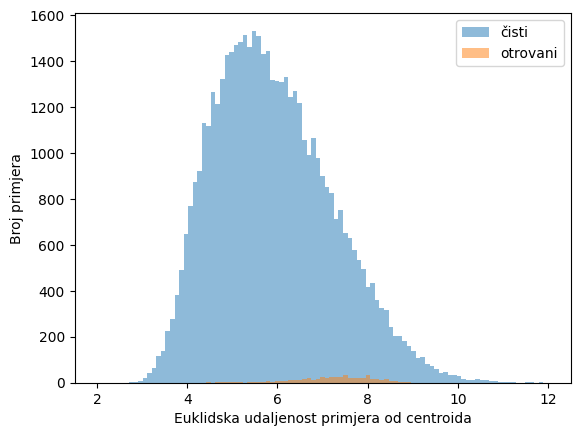

In [4]:
centroid = np.sum(features, axis=0) / features.shape[0]
distances = np.linalg.norm(features - centroid, axis=1)
plot_histogram_poisoned(distances, true_poison_indices, x_axis_label="Euklidska udaljenost primjera od centroida", y_axis_label="Broj primjera")

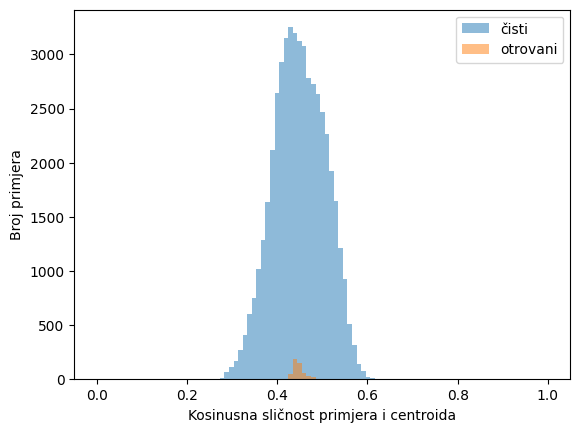

In [5]:
cosine = np.dot(features,centroid)/(np.linalg.norm(features, axis=1)*np.linalg.norm(centroid))
plot_histogram_poisoned(cosine, true_poison_indices, x_axis_label="Kosinusna sličnost primjera i centroida", y_axis_label="Broj primjera")

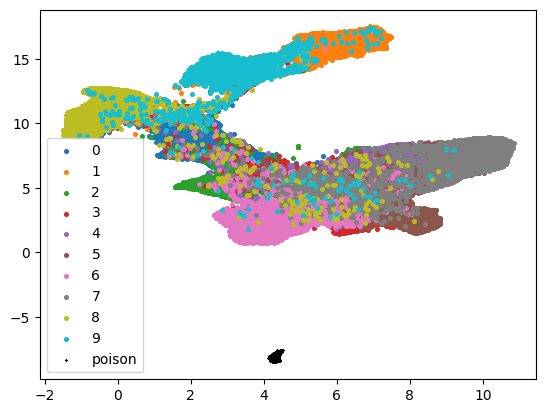

In [6]:
n_neighbors = int(len(dataset) / 500)
features_2d = calculate_features_2d(features, n_neighbors=n_neighbors)
plot_features_2d(features_2d, labels_poison, true_poison_indices, legend=True)

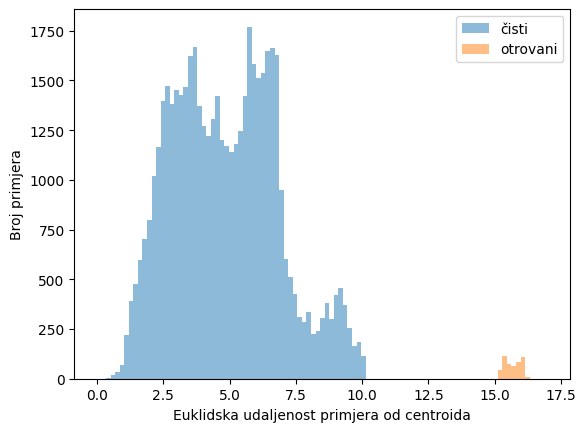

In [7]:
centroid = np.sum(features_2d, axis=0) / features.shape[0]
distances = np.linalg.norm(features_2d - centroid, axis=1)
plot_histogram_poisoned(distances, true_poison_indices, x_axis_label="Euklidska udaljenost primjera od centroida", y_axis_label="Broj primjera")

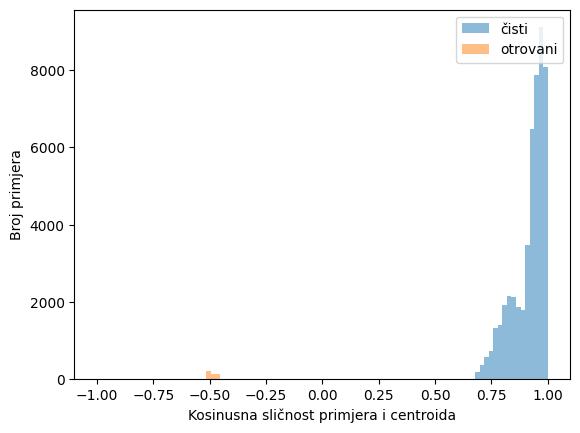

In [8]:
cosine = np.dot(features_2d,centroid)/(np.linalg.norm(features_2d, axis=1)*np.linalg.norm(centroid))
plot_histogram_poisoned(cosine, true_poison_indices, x_axis_label="Kosinusna sličnost primjera i centroida", y_axis_label="Broj primjera")

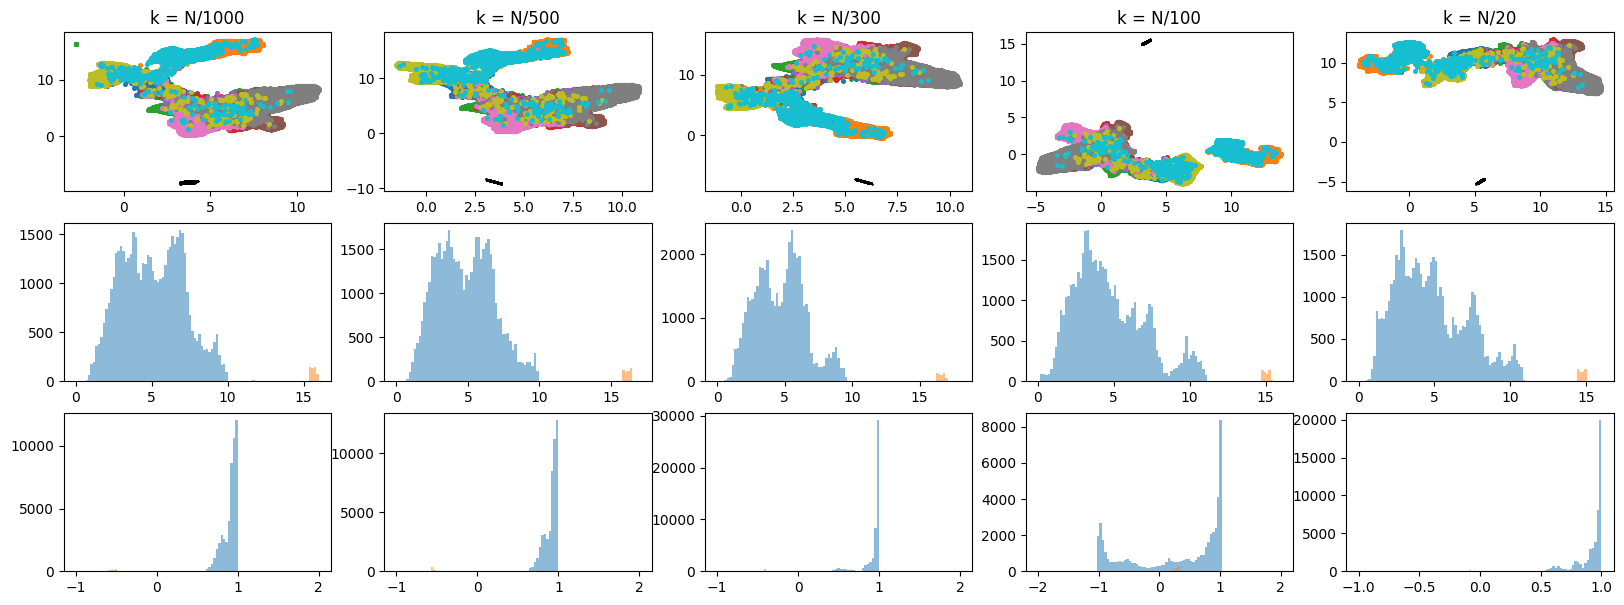

<Figure size 2000x1000 with 0 Axes>

In [24]:
k_range = lambda d: [
    d/1000,
    d/500,
    d/300,
    d/100,  
    d/20,   # d/2num_classes 
]

k_range_str = lambda d: [
    "N/1000",
    "N/500",
    "N/300",
    "N/100",   
    "N/20"
]



dataset_size = 50000 if train else 10000

fig, ax = plt.subplots(3, len(k_range(dataset_size)), figsize=(20,7))

for i, (k, k_str) in enumerate(zip(k_range(dataset_size), k_range_str(dataset_size))):

    n_neighbors = int(k)
    features_2d = calculate_features_2d(features, n_neighbors=n_neighbors)
    plt.subplot(3, len(k_range(dataset_size)), len(k_range(dataset_size))*0 + i+1)
    plot_features_2d(features_2d, labels_poison, true_poison_indices, legend=False, title=f"k = {k_str}", show=False)

    centroid = np.sum(features_2d, axis=0) / features.shape[0]
    distances = np.linalg.norm(features_2d - centroid, axis=1)
    plt.subplot(3, len(k_range(dataset_size)), len(k_range(dataset_size))*1 + i+1)
    plot_histogram_poisoned(distances, true_poison_indices, show=False, legend=False)

    cosine = np.dot(features_2d,centroid)/(np.linalg.norm(features_2d, axis=1)*np.linalg.norm(centroid))
    plt.subplot(3, len(k_range(dataset_size)), len(k_range(dataset_size))*2 + i+1)
    plot_histogram_poisoned(cosine, true_poison_indices, show=False, legend=False)

plt.figure(figsize=(20,10))
plt.show()

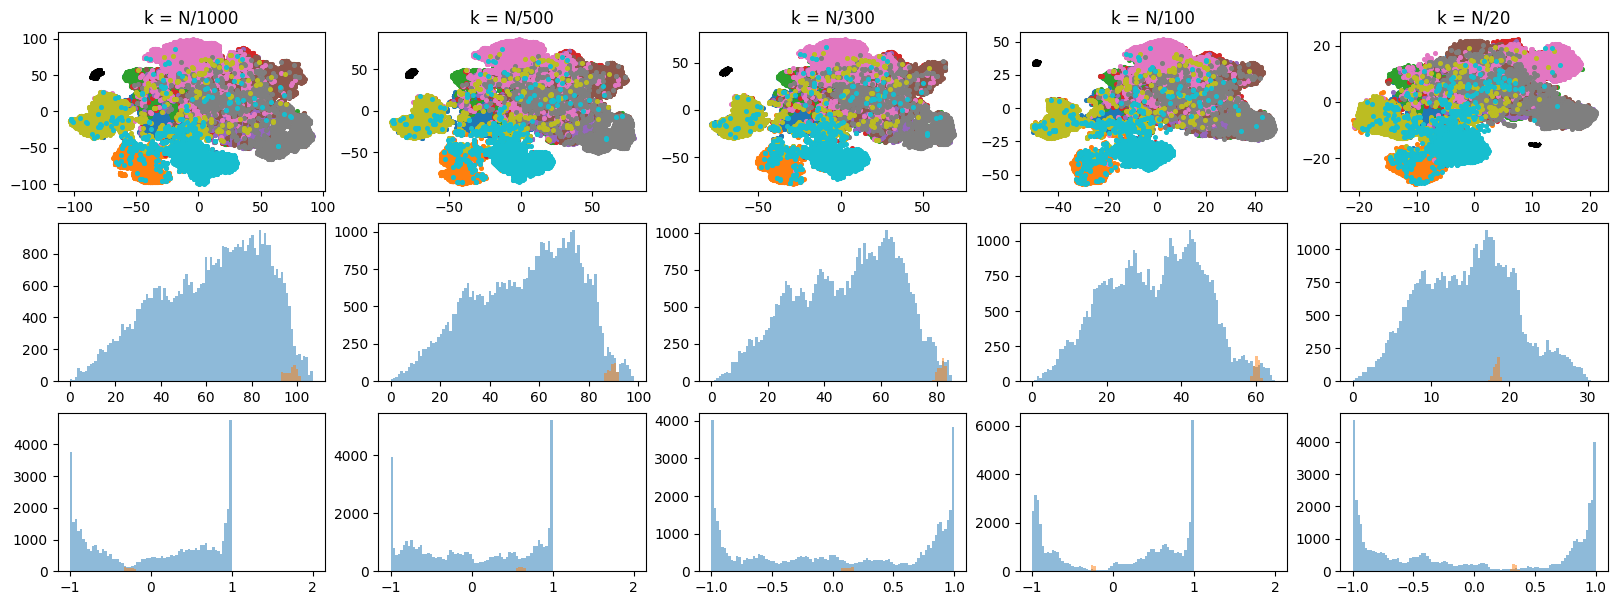

<Figure size 2000x1000 with 0 Axes>

In [25]:
k_range = lambda d: [
    d/1000,
    d/500,
    d/300,
    d/100,  
    d/20,   # d/2num_classes 
]

k_range_str = lambda d: [
    "N/1000",
    "N/500",
    "N/300",
    "N/100",   
    "N/20"
]



dataset_size = 50000 if train else 10000

fig, ax = plt.subplots(3, len(k_range(dataset_size)), figsize=(20,7))

for i, (k, k_str) in enumerate(zip(k_range(dataset_size), k_range_str(dataset_size))):

    n_neighbors = int(k)
    features_2d = calculate_features_2d(features, n_neighbors=n_neighbors, algorithm="tsne")
    plt.subplot(3, len(k_range(dataset_size)), len(k_range(dataset_size))*0 + i+1)
    plot_features_2d(features_2d, labels_poison, true_poison_indices, legend=False, title=f"k = {k_str}", show=False)

    centroid = np.sum(features_2d, axis=0) / features.shape[0]
    distances = np.linalg.norm(features_2d - centroid, axis=1)
    plt.subplot(3, len(k_range(dataset_size)), len(k_range(dataset_size))*1 + i+1)
    plot_histogram_poisoned(distances, true_poison_indices, show=False, legend=False)

    cosine = np.dot(features_2d,centroid)/(np.linalg.norm(features_2d, axis=1)*np.linalg.norm(centroid))
    plt.subplot(3, len(k_range(dataset_size)), len(k_range(dataset_size))*2 + i+1)
    plot_histogram_poisoned(cosine, true_poison_indices, show=False, legend=False)

plt.figure(figsize=(20,10))
plt.show()